<a href="https://colab.research.google.com/github/gvozdila/kaggle-xray/blob/master/Early_stopping_Albumentations_2_likeDeepFake_FastAI_xray_f1Score_%D0%A7%D0%B5%D1%80%D0%BD%D0%BE%D0%91%D0%B5%D0%BB%D0%BE%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#для kaggle 
#!pip install --user ../input/fastaimaster/torch-1.9.0-cp37-cp37m-manylinux1_x86_64.whl
!pip install -U fastai


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 204 kB 5.1 MB/s 
     |████████████████████████████████| 61 kB 9.0 MB/s 
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.4.4
    Uninstalling fastcore-1.4.4:
      Successfully uninstalled fastcore-1.4.4
  Attempting uninstall: fastai
    Found existing installation: fastai 2.6.3
    Uninstalling fastai-2.6.3:
      Successfully uninstalled fastai-2.6.3


In [ ]:
import fastcore
import fastai
print(f'fastcore version {fastcore.__version__} installed.')
print(f'fastai version {fastai.__version__} installed.')

fastcore version 1.4.5 installed.
fastai version 2.7.6 installed.


In [ ]:
#Когда будем юзать fastai2.medical.imaging , пока не используется
#!pip install pydicom kornia opencv-python scikit-image

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
#!pip install --no-cache-dir -I pillow
#еще один костыль.Если  ругается,типа AttributeError: module 'PIL.Image' has no attribute 'Resampling',раскомментировать и выполнить один раз

In [ ]:
from fastai import *
from fastai.vision.all import *



In [ ]:
#!pip uninstall opencv-python-headless==4.5.5.62

In [ ]:
!pip install opencv-python-headless==4.5.2.52

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.2 MB 118 kB/s 


In [ ]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-cqxmdr8j
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-cqxmdr8j
  Created wheel for albumentations: filename=albumentations-1.2.0-py3-none-any.whl size=116481 sha256=9109861e9f5d097759d48dcb9160082ca93db465f40c9c831110eabcb770017c
  Stored in directory: /tmp/pip-ephem-wheel-cache-b_ve7007/wheels/63/11/1a/c77caf3ae9b9b6d57b3ee5e6a41a50f3bc12c66a70f6b90bf0
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
#!Albumentations.Мегакрутая вещь!
# Начало albumentations


import albumentations as Alb
import cv2


class AlbTransform(Transform):
    def __init__(self, aug): self.aug = aug
    def encodes(self, img: PILImage):
        aug_img = self.aug(image=np.array(img))['image']
        return PILImage.create(aug_img)
    
def get_augs(): return  Alb.Compose([
    Alb.ImageCompression(quality_lower=60, quality_upper=100, p=0.5),
    Alb.GaussNoise(p=0.1),
    Alb.GaussianBlur(blur_limit=3, p=0.05),
    Alb.HorizontalFlip(),

    Alb.RandomBrightnessContrast(),
    Alb.OneOf([Alb.RandomBrightnessContrast(), Alb.FancyPCA(), Alb.HueSaturationValue()], p=0.7),
    #Alb.PadIfNeeded(),Сильно меняет изображение, попробовать отдельно c ним
    Alb.ToGray(p=0.2), 
    Alb.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=10, p=0.5),
                                     ])  
  
    
#Надо посмотреть, что еще можно подобрать, исходя из условий задачи.
#статьи по подбору аугментации в мед процессинге
#https://arxiv.org/pdf/2010.11695.pdf
#https://arxiv.org/pdf/2003.04696v5.pdf




In [ ]:
item_tfms = [Resize(224), AlbTransform(get_augs())]
batch_tfms = Normalize.from_stats(*imagenet_stats) 

# Конец albumentations

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:1766: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  "blur_limit and sigma_limit minimum value can not be both equal to 0. "


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path='/content/drive/MyDrive/train_xray'
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')[['SOPInstanceUID', 'Target']]
train_df['Target'] = train_df['Target'].apply(lambda x: x.strip())





In [ ]:
train_df

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125,15
2,1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162,12
3,1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257,14
4,1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016,3
...,...,...
1733,1.2.826.0.1.3680043.8.498.99711016467406172920578985719244800351,14
1734,1.2.826.0.1.3680043.8.498.99727280485333900933067489723088200708,11
1735,1.2.826.0.1.3680043.8.498.99935008698914755885142961280499046059,3
1736,1.2.826.0.1.3680043.8.498.99969671777553755311455387279891445345,2


In [ ]:
dls = ImageDataLoaders.from_df(train_df,
                               path=train_path, 
                               suff='-c.bone.jpg',
                               item_tfms=item_tfms,
                               batch_tfms=batch_tfms, 
                               shuffle=True, 
                               bs=64, 
                               valid_pct=0.2,
                               label_delim=' ',# !важно! - предупреждаем нейросеть,что у нас есть некоторая multi-label problem
                                               # без этого будет вываливаться ошибка при обучении cnn
                               num_workers = 0, #Чтобы не переполнялась память при обучении
                               )

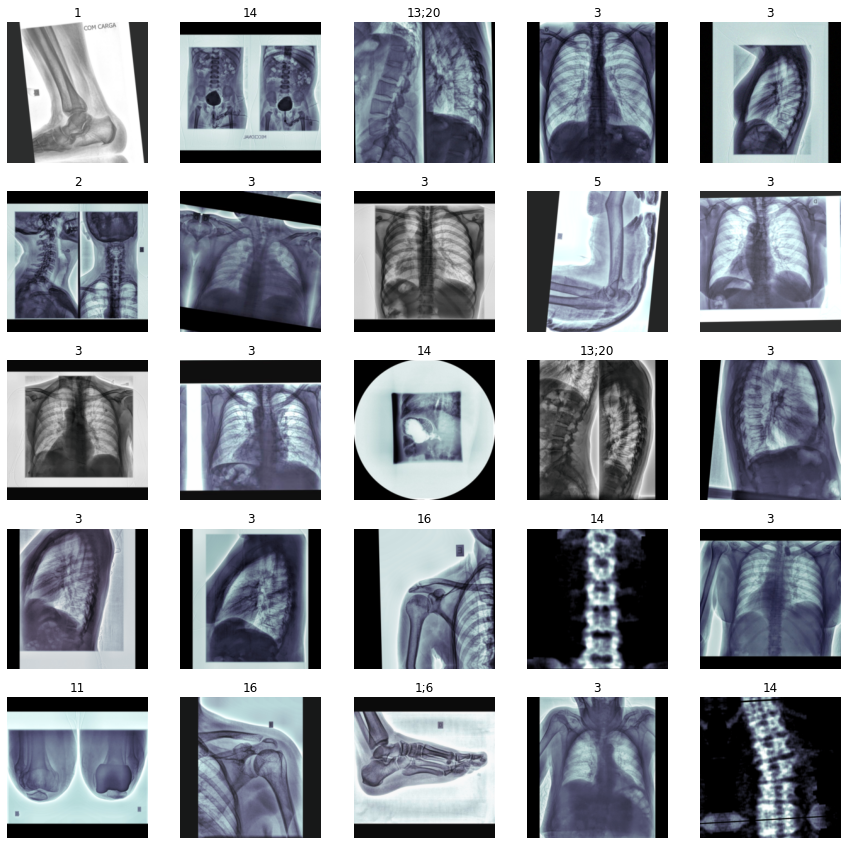

In [ ]:
dls.train.show_batch(max_n=25)


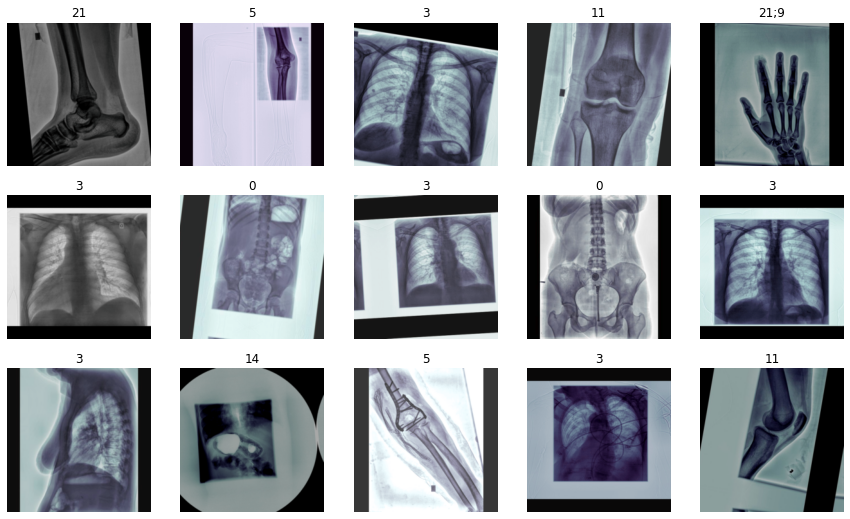

In [ ]:
dls.valid.show_batch(max_n=15)

In [ ]:
#Чтобы корректно считалась метрика F1Score, взял с public kernel этого Kaggle-соревнования.
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_micro = F1ScoreMulti(thresh=0.5, average='micro')
f1_weighted = F1ScoreMulti(thresh=0.5, average='weighted')



In [ ]:
learn = vision_learner(dls, resnet50, 
                    metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples, f1_micro, f1_weighted]
                      )

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

CPU times: user 3min 34s, sys: 30 s, total: 4min 4s
Wall time: 23min 10s


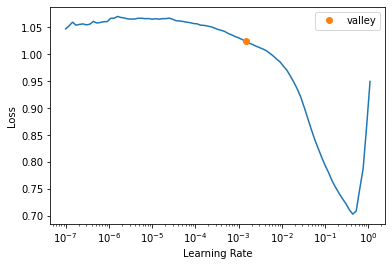

In [ ]:
%%time
lr = learn.lr_find() 

In [ ]:
#14888//.

In [ ]:
%%time
learn.fine_tune(90,1e-3,cbs=[EarlyStoppingCallback(patience=10)]
                #lr[0]
                )

epoch,train_loss,valid_loss,accuracy_multi,f1_score,f1_score,f1_score,f1_score,time
0,0.999445,0.724422,0.573094,0.150133,0.179858,0.174310,0.428458,07:09


epoch,train_loss,valid_loss,accuracy_multi,f1_score,f1_score,f1_score,f1_score,time
0,0.900640,0.697665,0.585931,0.156644,0.185015,0.179174,0.449314,01:04
1,0.884260,0.680196,0.602436,0.158734,0.192900,0.185235,0.451688,01:03
2,0.869289,0.657614,0.621692,0.170741,0.207027,0.195991,0.477344,01:09
3,0.858170,0.643747,0.630207,0.172574,0.213093,0.200057,0.483209,01:05
4,0.841573,0.638630,0.636757,0.171490,0.214478,0.201095,0.479727,01:05
5,0.825786,0.630447,0.642520,0.177779,0.216945,0.205068,0.484704,01:03
6,0.811135,0.614893,0.663610,0.187514,0.226256,0.213235,0.494395,01:03
7,0.793783,0.590903,0.691774,0.193567,0.248686,0.229787,0.509423,01:03
8,0.774900,0.575076,0.717186,0.205896,0.265105,0.243783,0.515144,01:05
9,0.753862,0.546770,0.742992,0.223092,0.287145,0.263514,0.538743,01:07


No improvement since epoch 34: early stopping
CPU times: user 38min 49s, sys: 5min 55s, total: 44min 45s
Wall time: 48min 23s


In [ ]:
#Predictions to csv

In [ ]:
#!zip -r test.zip /content/drive/MyDrive/xr/xray/test

In [ ]:
#!unzip -j /content/test.zip -d /content/drive/MyDrive/test

In [ ]:
test_df = pd.read_csv ('/content/drive/MyDrive/xr/xray/sample_submission.csv')
# pd.read_csv ('/content/submit.csv')
#pd.read_csv ('/content/drive/MyDrive/xr/xray/sample_submission.csv')
test_path= ('/content/drive/MyDrive/test')

In [ ]:
test_df

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10001001190452685542754353271306894106,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21
1,1.2.826.0.1.3680043.8.498.10022667601042710442884728915610557590,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21
2,1.2.826.0.1.3680043.8.498.10024395388921105474336784272390605225,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21
3,1.2.826.0.1.3680043.8.498.10026689165626095651568657562992631805,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21
4,1.2.826.0.1.3680043.8.498.10035936364561920980924160549027696414,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21
...,...,...
738,1.2.826.0.1.3680043.8.498.98950979295424909746555980174715994054,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21
739,1.2.826.0.1.3680043.8.498.99120415799121180043999929775380253296,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21
740,1.2.826.0.1.3680043.8.498.99132008951330408682785705454375383148,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21
741,1.2.826.0.1.3680043.8.498.99611256581875030709909119881605604054,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21


In [ ]:
tdls = ImageDataLoaders.from_df(test_df, path=test_path, suff='-c.bone.jpg',
   item_tfms=item_tfms, batch_tfms=batch_tfms, shuffle=False)
tst_dl = tdls.test_dl(test_df) 

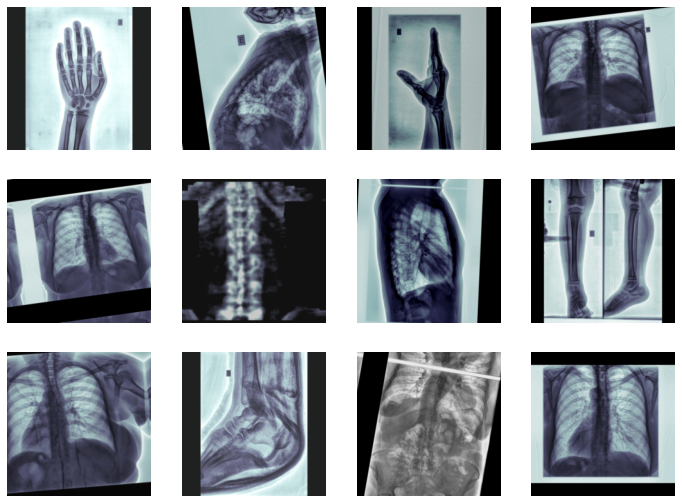

In [ ]:
tst_dl.show_batch(max_n=12)

In [ ]:
%%time
preds = learn.tta(dl=tst_dl, n=64, use_max=False)
#preds = learn.get_preds(dl=tst_dl, n=64, use_max=False)
#preds = learn.get_preds(dl=tst_dl)
#preds = learn.get_preds

CPU times: user 1min 51s, sys: 7.72 s, total: 1min 58s
Wall time: 18min 57s


In [ ]:
#!pip uninstall nbdev.//
#!pip install nbdev

In [ ]:
predss = learn.dls.vocab[np.argmax(preds[0], axis=1)]

In [ ]:
test_df['Target'] = predss

In [ ]:
submission_df = test_df[['SOPInstanceUID', 'Target']]

In [ ]:
submission_df.to_csv(f'Goooodboy.csv', header=True, index=False)

In [ ]:
submission_df

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10001001190452685542754353271306894106,9
1,1.2.826.0.1.3680043.8.498.10022667601042710442884728915610557590,3
2,1.2.826.0.1.3680043.8.498.10024395388921105474336784272390605225,9
3,1.2.826.0.1.3680043.8.498.10026689165626095651568657562992631805,3
4,1.2.826.0.1.3680043.8.498.10035936364561920980924160549027696414,3
...,...,...
738,1.2.826.0.1.3680043.8.498.98950979295424909746555980174715994054,3
739,1.2.826.0.1.3680043.8.498.99120415799121180043999929775380253296,3
740,1.2.826.0.1.3680043.8.498.99132008951330408682785705454375383148,3
741,1.2.826.0.1.3680043.8.498.99611256581875030709909119881605604054,21


In [ ]:
test_df.Target.value_counts()

11    262
7     227
5     111
17     87
12     33
9       7
21      6
19      4
0       3
13      3
Name: Target, dtype: int64

AttributeError: 'dict' object has no attribute ..

'When you bring your learner back in make sure to re-define any functions your model wants to use along with it'


In [ ]:
interp.most_confused(min_val=5)

NameError: ignored